<a href="https://colab.research.google.com/github/DavidLubkeman/Power_System_Analysis_with_Python/blob/main/Power_System_Transients_Analysis/RL_Circuit_Fault_Analysis/RL_Circuit_Fault_Analysis__Transient_Current_Solution(Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> Power System Analysis with Python
<br>
Topic Area: Power System Transients
</center>


# RL Circuit Fault Analysis - Transient Current Solution using Python
<br>
<center>

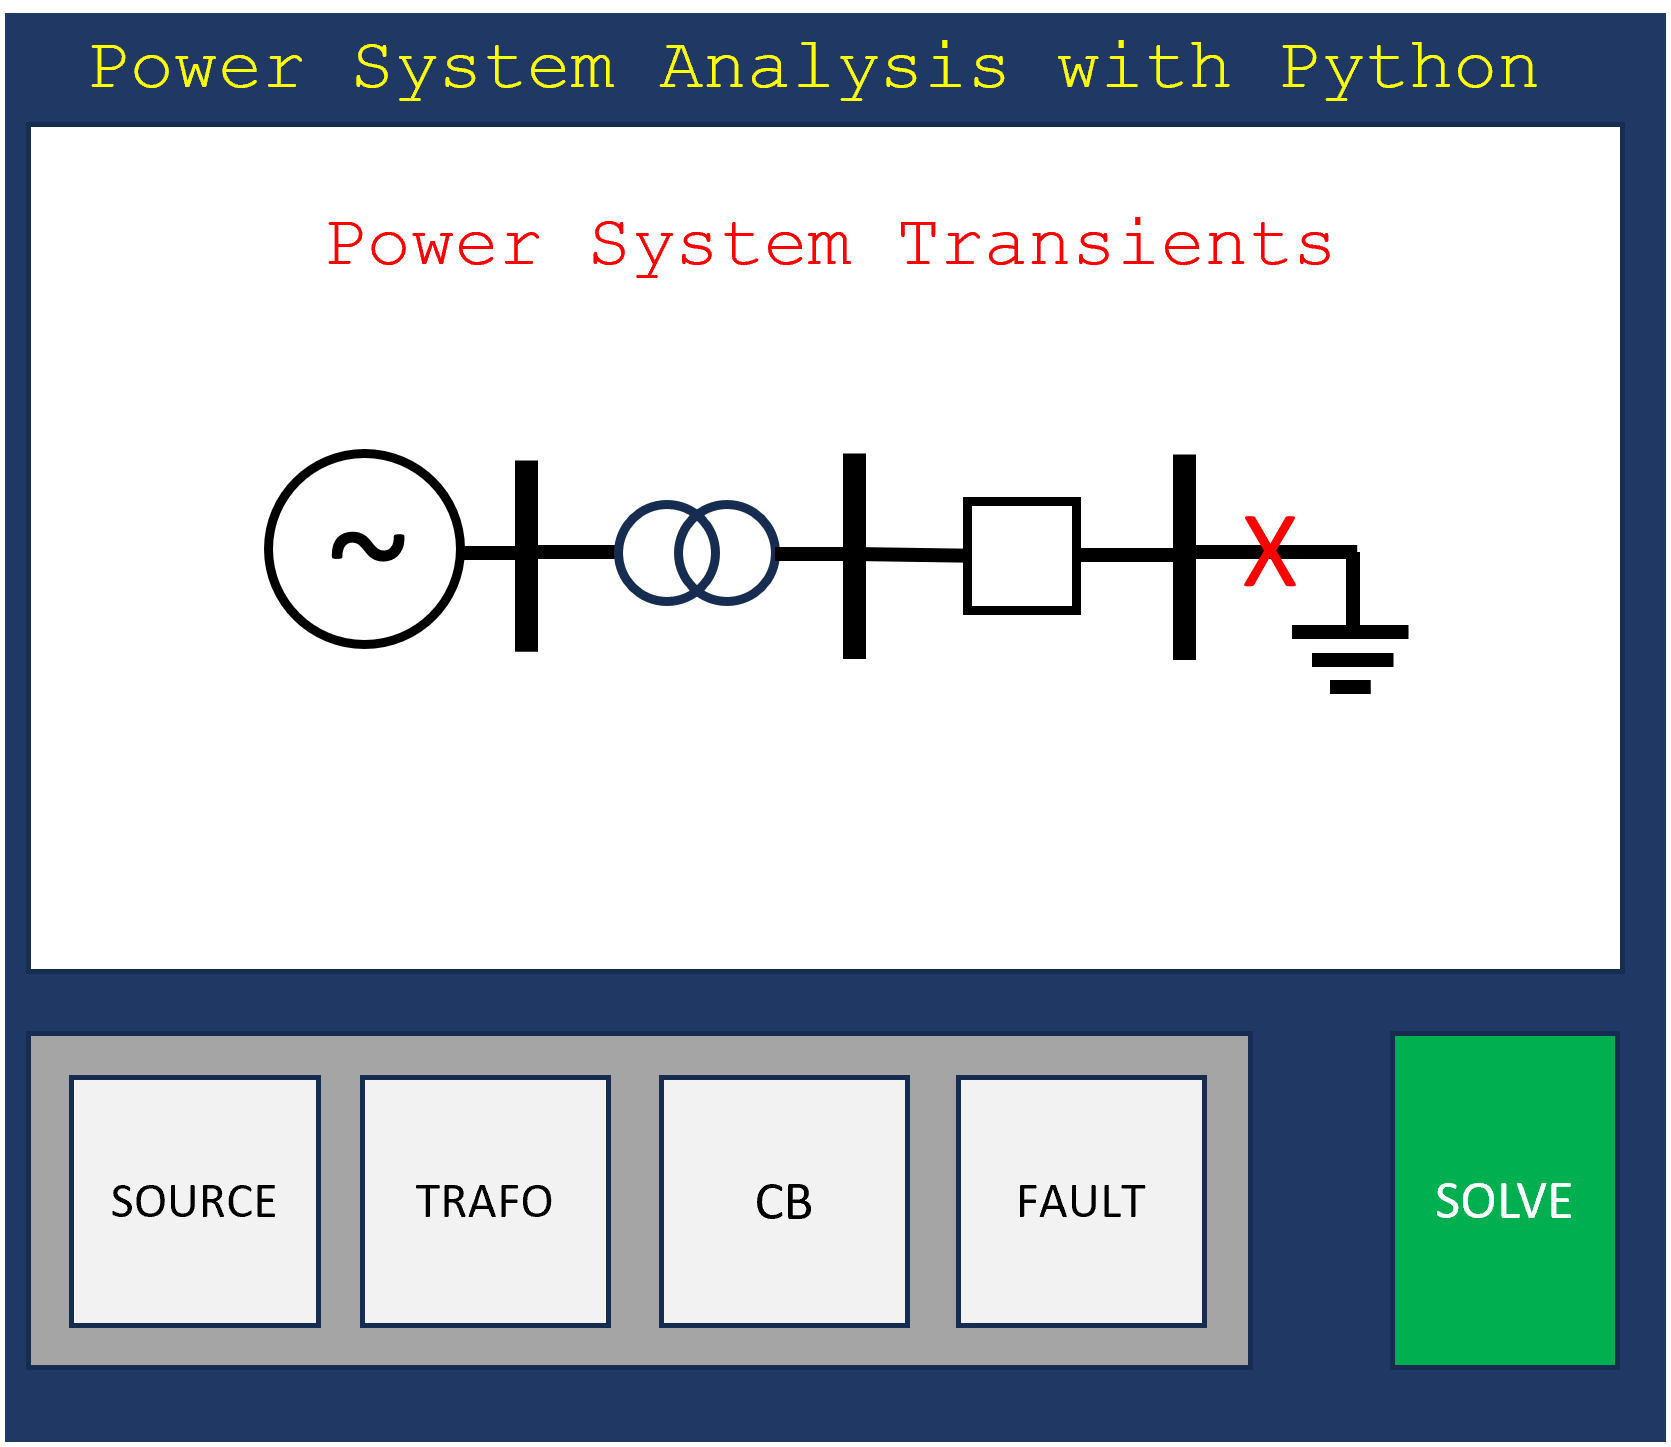


<br>
<center>
    
## Dr. David Lubkeman



## Introduction

In this presentation we will be looking at how to perform power system fault analysis (one-line diagram on left) using an RL circuit model in order to solve for the transient fault current (plot on right).

We will start by deriving a closed-form equation for the transient behavior of an ideal single-phase fault on a radial power system.

Then we will look at a Python programming example  for computing and plotting the fault characteristics.



<center>

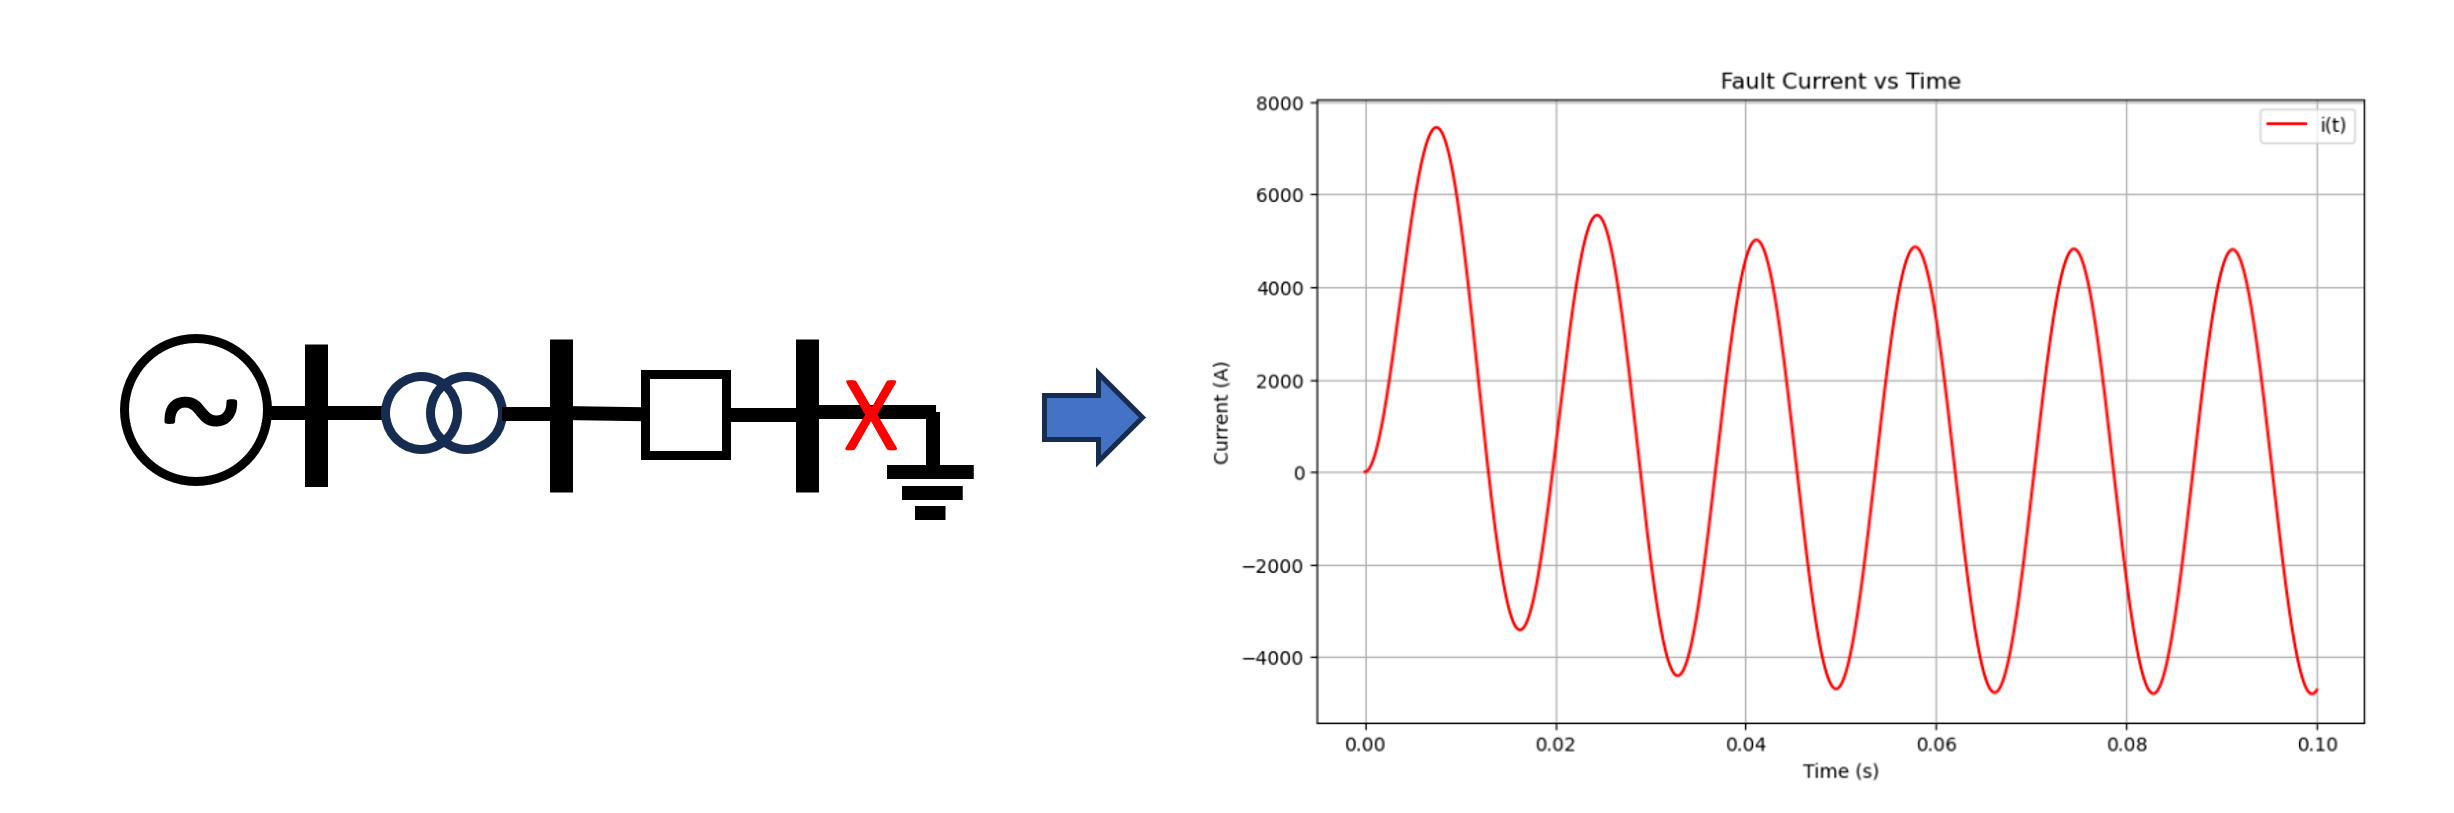

<br>    
Figure - Transient Fault Analysis Objectives
</center>

### Presentation Format

Presentation notes with Python programming examples are in Jupyter Notebook format (www.jupyter.org).

You are encouraged to download a copy of this notebook from the Github site so you can follow along. A link to the site is provided in the video description.

From the Github site you have the following options to view the notebook yourself:

1. Source Notebook .ipynb file with image files.

2. A Google Colab version is provided so you can run this notebook on a Google cloud server.

3. Python code *.py version is provided so you can execute this notebook in a Python coding environment.

4. PDF version with text and images only.


  


### Fault Analysis Scenario

The scenario we will be analyzing is a single-source radial system with fault location as illustrated below.

In this scenario we have a
- Power system with voltage source and source impedance Z
- Single-phase fault modeled by an ideal switch
- Circuit breaker set up to clear a fault
- Relay that monitors the breaker current, detects the fault and sends open and close commands to the breaker.



<center>

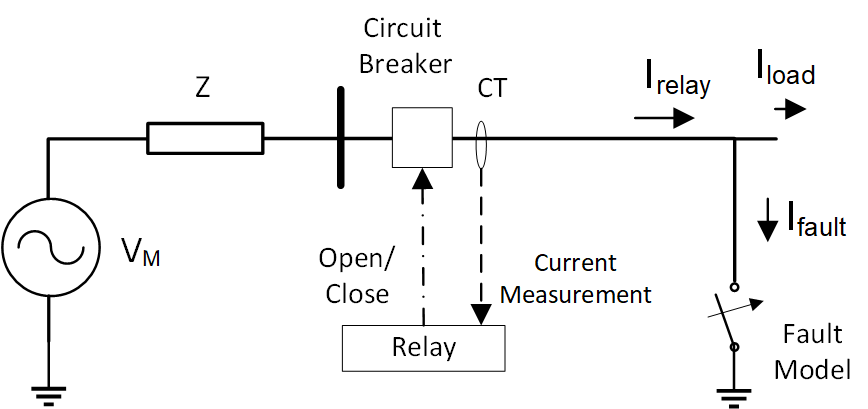

<br>
Figure - RL Fault Circuit with Relay
</center>

### Fault Current Characteristics

An example fault measurement for a medium-voltage circuit is shown below.

Note that we have
- A prefault load current
- A peak instantaneous current magnitude ( > interrupting current)
- A steady-state current to be interrupted by protection device

We want to be able to predict this fault current based on the circuit model.



<center>

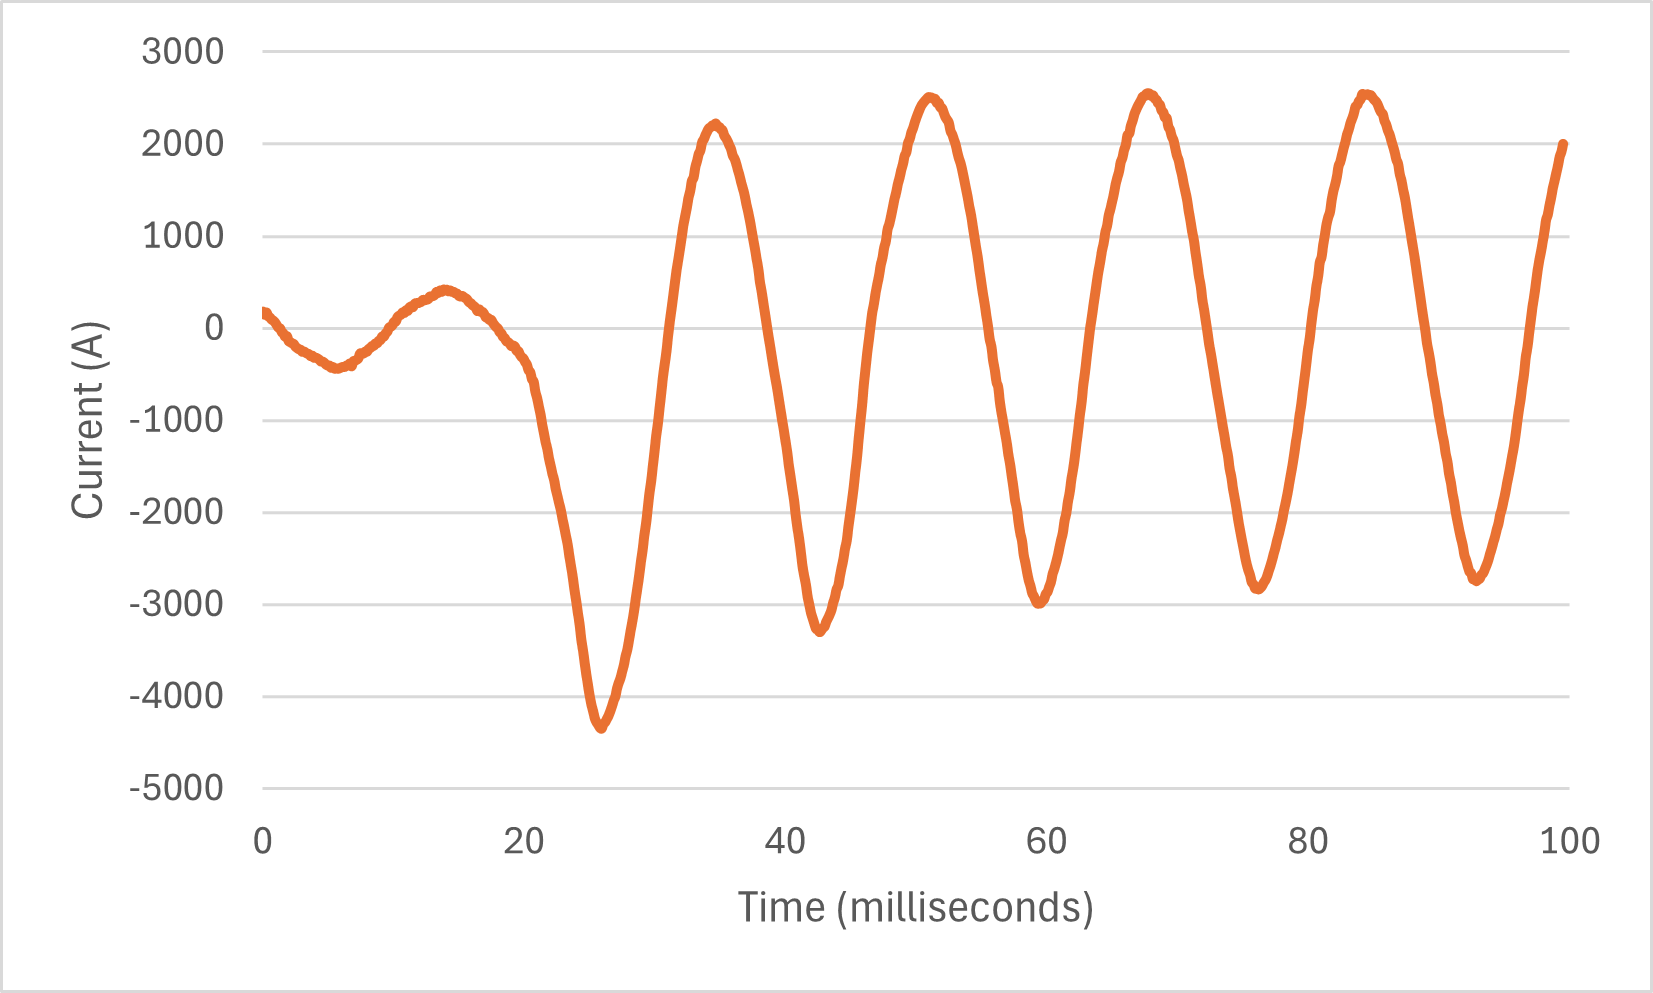

<br>
Figure - Actual Fault Current Measurement   
</center>

### RL Fault Circuit Model

The equivalent RL circuit model is shown below. Note that:

-   Calculation based on a Thevenin equivalent circuit as seen from
    point of fault
-   Equivalent voltage corresponds to
    ${v_s}\left( t \right) = \sqrt 2 {V_M}\sin \left( {\omega t + \theta } \right)$
    where ${V_M}$ is the per-phase nominal voltage RMS magnitude and
    $\theta$ is the point on wave angle for the fault
-   Equivalent series R and L are self-impedances for the faulted phase
-   Will initially consider a no load case, so prefault current is 0
-   Format equations assuming fault occurs at time, t=0
-   Since inductor current cannot change instantaneously, then $i(t=0) = 0$

    



<center>

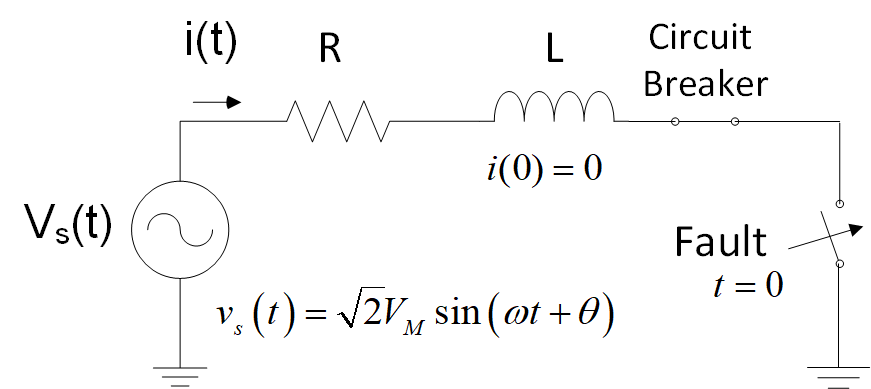

<br>
Figure - RL Fault Circuit Model
</center>


## Ordinary Differential Equation (ODE) for Fault Current

When the switch modeling the fault closes at $t=0$, then we have a basic
loop circuit where current is related to the source voltage by


$$ L\frac{{di}}{{dt}} + Ri = \sqrt 2 {V_M}\sin \left( {\omega t + \theta } \right) \tag{1} $$

with a boundary condition for current $i(0) = 0$

In this formulation, the point on wave angle $\theta$ is adjusted to
give us the desired voltage at $t=0$.

So for example, a fault occurring during a point on wave equal to the
peak voltage has $\theta =90$ degrees.

### ODE Solution Components

For this linear RL circuit, the solution has a steady-state
component and a transient component as follows:
$$i\left( t \right) = {i_{ss}}\left( t \right) + {i_{tr}}\left( t \right) \tag{2}$$
where

-   Steady-state component (ss), also referred to as the particular
    solution, corresponds to what occurs in steady-state due to the
    sinusoidal forcing function.

-   Transient component (tr), also referred to as the complementary
    solution, has a form that can be obtained by looking at the natural
    response of the circuit without a forcing function.


### Steady-State Solution Component

To obtain the steady-state component of the solution, perform a phasor
analysis using the circuit shown below and convert the result back to
the time domain.

<center>

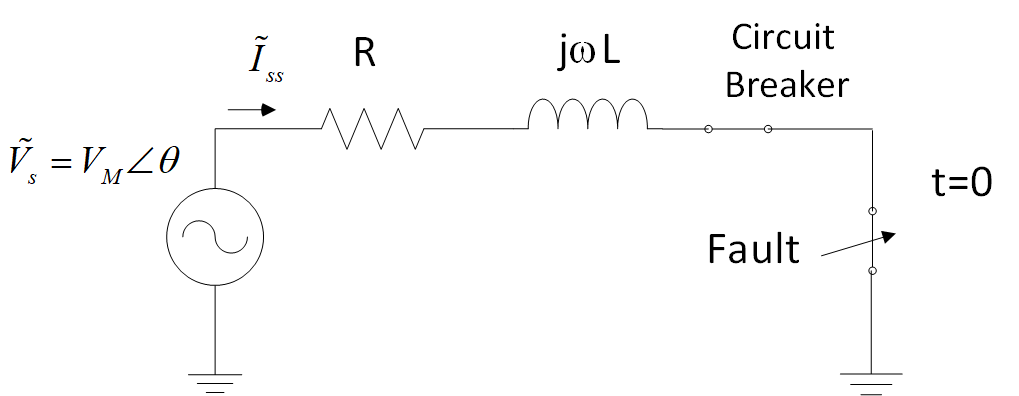

<br>
Figure - RL Transient Steady-State Model
</center>

The circuit impedance is given by:
$$Z = R + j\omega L = \sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} \angle \phi \tag{3} $$
$$  \phi  = {\tan ^{ - 1}}\left( {\frac{{\omega L}}{R}} \right) \tag{4} $$

Solving for the steady-state current phasor (RMS magnitude) results in
$${\tilde I_{ss}} = \frac{{{V_M}\angle \theta }}{Z} = \frac{{{V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\angle \theta  - \phi \tag{5}$$

In the time domain this converts back to
$$ {i_{ss}}(t) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\sin \left( {\omega t + \theta  - \phi } \right) \tag{6}$$

### Steady-State Solution Waveform

Plot below shows an example steady-state fault current.

Note how this waveform is symmetrical about the y-axis, which is why
this is referred to as the "symmetrical current".

The RMS magnitude of this current is used to size the interrupting
capability of the circuit breaker.

The RMS magnitude is also used for protection coordination with upstream
and downstream protection devices.


<center>

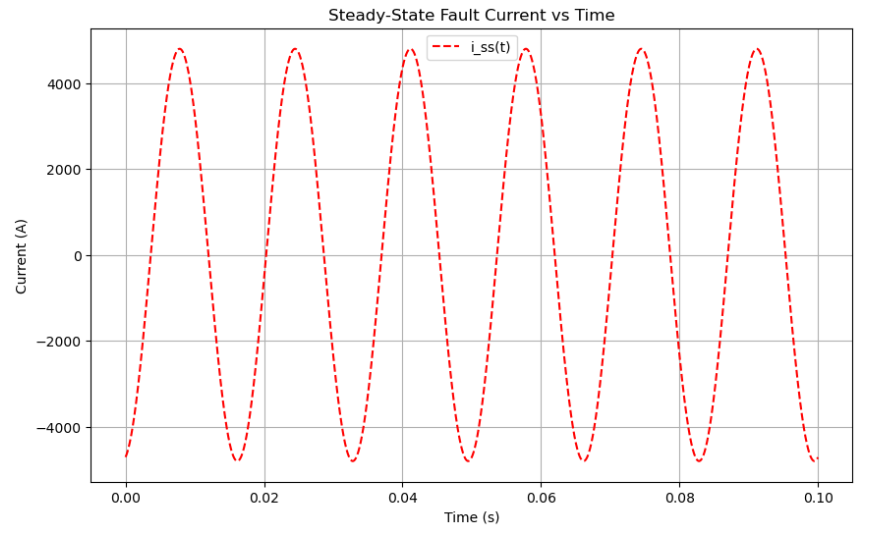

<br>
Figure - Symmetrical Fault Current Example
</center>

### But Solution is Still Incomplete!

We can see that the above steady-state solution is incomplete since the
boundary condition of $i(0) = 0$ is not satisfied.

If we just computed the steady-state component, we see an instantaneous
jump in the current when the fault is applied.

This is not possible since current cannot change instantaneously in the
series inductance.

So we need to model the transition from a steady-state prefault circuit
to a steady-state faulted circuit by including the transient component.

### Transient Component Equation

The transient component of the solution is found by solving the circuit
shown below, which has no forcing function.

<center>

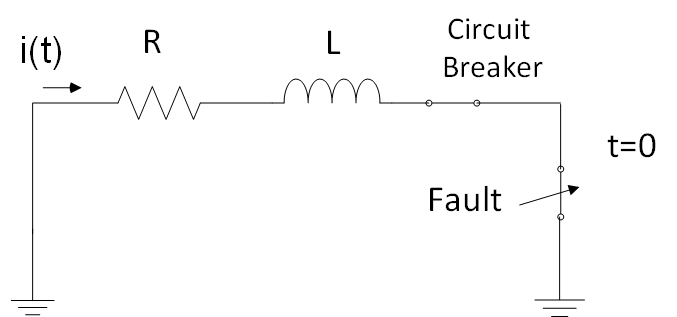

<br>
Figure - RL Transient Natural Response Model
</center>

The equation to be solved is

$$ L\frac{{di}}{{dt}} + Ri = 0 \tag{7}$$

Solution to this equation is of the form $i(t)=A{e^{st}}$ where $A$ is a
constant depending on the state of the circuit at $t=0$ and s is a complex number.

If we substitute exponential expression into Equation (7) to get
$$ L\frac{{d\left( {A{e^{st}}} \right)}}{{dt}} + R\left( {A{e^{st}}} \right) = sL\left( {A{e^{st}}} \right) + R\left( {A{e^{st}}} \right) = 0 \tag{8}$$

then divide
both sides of equality by $A{e^{st}}$, we obtain what is referred to as
the characteristic equation for the natural response
$$ \left( {s + \frac{R}{L}} \right) = 0  \tag{9} $$
where
$$ s =  - \frac{R}{L} \tag{10} $$

### Transient Component Solution Impact

Transient component of the solution given by
$$  {i_{tr}}\left( t \right) = A{e^{ - \left( {R/L} \right)t}} \tag{11}$$

The total solution for the fault current is the sum of the steady-state
and transient components:

$$i(t) = {i_{ss}} + {i_{tr}} = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\sin \left( {\omega t + \theta  - \varphi } \right) + A{e^{ - \left( {R/L} \right)t}} \tag{12}$$

The constant $A$ must still be determined by applying initial circuit
condition of $i(t=0)=0$.

Note that the exponential term will add an exponentially decaying DC
component to the steady-state current that satisfies the initial current
constraint.

### Application of Boundary Conditions

Since the current flowing through the inductor cannot change
instantaneously, then current before and after switching at $t=0$ is
defined by:

$$ i\left( {{0^ - }} \right) = i\left( {{0^ + }} \right) = 0 \tag{13}$$

When we apply this initial condition at $t=0$ to solve for $A$, we find that
$$ A = - \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\sin \left( {\theta - \varphi } \right) \tag{14}$$

giving us a final solution of $$ \begin{array}{l}
i\left( t \right) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\left( {\sin \left( {\omega t + \theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right)} \right.\\
\left. {\quad \quad \quad \quad \quad \quad \quad  - \sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right)
\end{array} \tag{15}$$

Observe that the current is not only dependent on ${V_M}$, R and L, but
point on wave angle $\theta$ for voltage as well.

## Python Code for Fault Current (using Math library)

Applying the Equations (1)-(15), we can calculate and plot the current
using the example Python code provided below.

You can adjust the circuit parameters R, X, Vm, f, $\theta$ as needed. Note that
reactance is normally given as input, so need to convert this to
inductance.

In this example code, the (1) fault current is plotted with the solid
curve and the (2) steady-state and (3) transient components are plotted
with dashed curves.

Plot broken into 3 curves to show that the transient component adds a
decaying DC offset to the sinusoidal steady-state current.

Note code utilizes List data structures and Math library for basic
mathematical functions.

Vm: 13856 R: 0.8 L: 0.01061 theta(degrees): 0.0


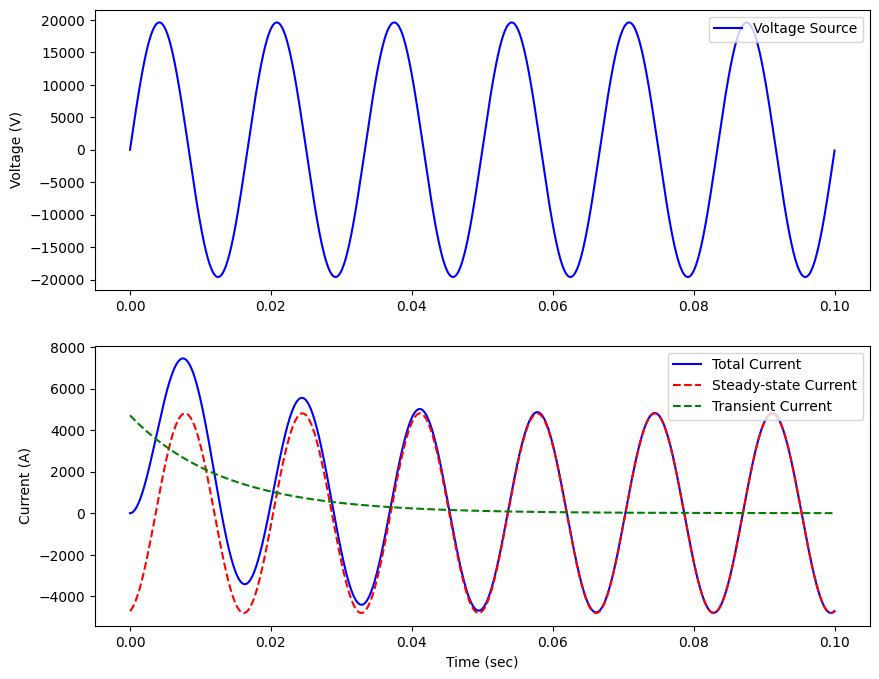

Peak instantaneous value of fault current: 7447 A
Peak steady-state value of fault current: 4804 A
I_asym to I_sym ratio: 1.55 for X/R ratio: 5.00


In [1]:
# Python code for computing fault current assuming a single-phase source
# with reactance X and resistance R. Voltage source defined by line voltage Vm, frequency f
# and fault point on wave (POW) angle theta.

import math # https://docs.python.org/3/library/math.html
import matplotlib.pyplot as plt     # https://matplotlib.org/

def current_vs_time(t, Vm, R, X, w, L, theta):
    """Calculate current i as a function of time t for a single-phase fault.
    Returns 3 values for current: (i) total current (ii) steady-state component
    (iii) transient component."""
    vsource = math.sqrt(2) * Vm * math.sin(w * t +theta)
    Imag = math.sqrt(2) * Vm / math.sqrt(R**2 + X**2)  # Steady-state peak magnitude
    i_ss = math.sin(w * t + theta - math.atan(w * L / R)) # Steady-state component
    i_tr = math.sin(theta - math.atan(w * L / R)) * math.exp(-(R / L) * t) # Transient decay
    return Imag * (i_ss - i_tr), Imag*i_ss, -Imag*i_tr, vsource

def plot_current_components(t_values, itotal_values, iss_values, itr_values, vsource_values):
    """Plot the current components vs time"""
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    ax[0].plot(t_values, vsource_values, color='blue', label='Voltage Source')
    ax[0].set_ylabel('Voltage (V)')
    ax[0].legend(loc='upper right')

    ax[1].plot(t_values, itotal_values, color='blue', label='Total Current')
    ax[1].plot(t_values, iss_values, color='red', linestyle='--', label='Steady-state Current')
    ax[1].plot(t_values, itr_values, color='green', linestyle='--', label='Transient Current')
    ax[1].set_xlabel('Time (sec)')
    ax[1].set_ylabel('Current (A)')
    ax[1].legend(loc='upper right')

    plt.show()


# Parameters
Vm = 24000/math.sqrt(3)  # 24kV line voltage, divide by sqrt(3) to get line-to-neutral
R = 0.8   # Representative R and X for source in Ohms
X = 4.0   # X/R ratio = 5
X_to_R_ratio = X/R
f = 60.0 # fundamental frequency, could also set to 50 Hz
w = 2 * math.pi * f  # Angular frequency
L = X/w  # Inductance in Henries
theta = (0/4)*math.pi  # In radians! Point on wave angle for fault; assume to be zero for now

# Values for Benchmarking
print(f"Vm: {Vm:.0f} R: {R:.1f} L: {L:0.5} theta(degrees): {(theta*180/math.pi):0.1f}")

# Time values list corresponding to 6 cycles of ac voltage source waveform
# Resolution set to 1024 points per cycle
t_values = [] # Set list to Null

for i in range(6*1024): # Adjust the time range and number of points as needed
    t_values.append(i * (1/f) / 1024)  # Delta t = (period in sec)/(samples per sec)

# Note can simplify 'for' loop above using List Comprehension
#t_values = [i * (1/f) / 1024 for i in range(6*1024)]

# Calculate current component values, put into list format
itotal_values = []
iss_values = []
itr_values = []
vsource_values = []
for t in t_values:
    i_total, i_ss, i_tr, vsource = current_vs_time(t, Vm, R, X, w, L, theta)
    itotal_values.append(i_total)
    iss_values.append(i_ss)
    itr_values.append(i_tr)
    vsource_values.append(vsource)

# Note can simplify for loop above by using List Comprehension.
# The 'zip' function returns a zip object, which is an iterator of tuples.
# This is needed since we are computing 3 different current lists for the plotting.
#itotal_values, iss_values, itr_values = zip(*[current_vs_time(t, Vm, R, X, w, L, theta) for t in t_values])

# Plot fault  current components
plot_current_components(t_values, itotal_values, iss_values, itr_values, vsource_values)

# Search current results to find instantaneous peak and steady-state peak and use
# these values to compute asymmetrical (instantaneous) peak to symmetrical (steady-state)
# peak ratio.
asymmetrical_current_peak = max(abs(x) for x in itotal_values)
print(f"Peak instantaneous value of fault current: {asymmetrical_current_peak:.0f} A")

symmetrical_current_peak = max(abs(x) for x in iss_values)
print(f"Peak steady-state value of fault current: {symmetrical_current_peak:.0f} A")

Iasym_Isym_ratio = asymmetrical_current_peak/symmetrical_current_peak
print(f"I_asym to I_sym ratio: {Iasym_Isym_ratio:.2f} for X/R ratio: {X_to_R_ratio:.2f}")


### Fault Current Simulation Takeaways

- There is an asymmetrical addition to the symmetrical fault current that must be factored into the circuit breaker instantaneous withstand rating.

- In the time it takes to interrupt the fault (after several cycles), the DC offset current component will have typically decayed out. So by the time the circuit
breaker operates open, the breaker just needs to interrupt the steady-state AC component of the fault current.

- If we adjust the voltage point on wave angle $\theta$, we get the following results:
<center>DC Transient Offset as function of Theta</center>

<center>

| Theta (deg)  | 0    | 45   | 90   | 135  | 180  |
|--------------|------|------|------|------|------|
| I_asym (A)   | 7447 | 6547 | 5186 | 6715 | 7447 |
| I_sym (A)    | 4804 | 4804 | 4804 | 4804 | 4804 |
| I_asym/I_sym | 1.55 | 1.36 | 1.08 | 1.40 | 1.55 |

</center>

- From the above table, once can see that amount of transient DC offset is dependent on the voltage
point on wave at which the fault occurs.

- The worst case current peak occurs when $\theta$ = 0 or $\pi$.  This condition corresponds to worst case charging of the inductor from its initial value of 0 Amperes.



### Benchmarking Python Simulation using PSCAD

Whenever you write your own simulation code, it is helpful to benchmark
the results using either a commericial analysis program or a case study
with complete results.

In this case we will compare the Python results
with PSCAD Free (<https://www.pscad.com/software/pscad/free-edition>).

PSCAD is specifically designed for power system transient analysis. The
'Free' version is a reduced-capability version released for
noncommerical purposes, such as university courses.


### PSCAD Simulation Circuit Model

<center>

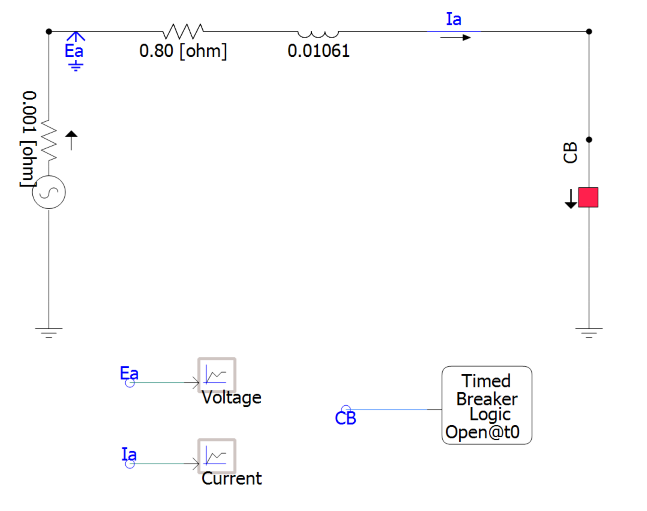


</center>

### PSCAD Simulation Results

The case below is for $\theta = 0$ degrees.  

From PSCAD we get I_asym= 7442 and I_sym = 4804, which match closely with the Python simulation.

<center>

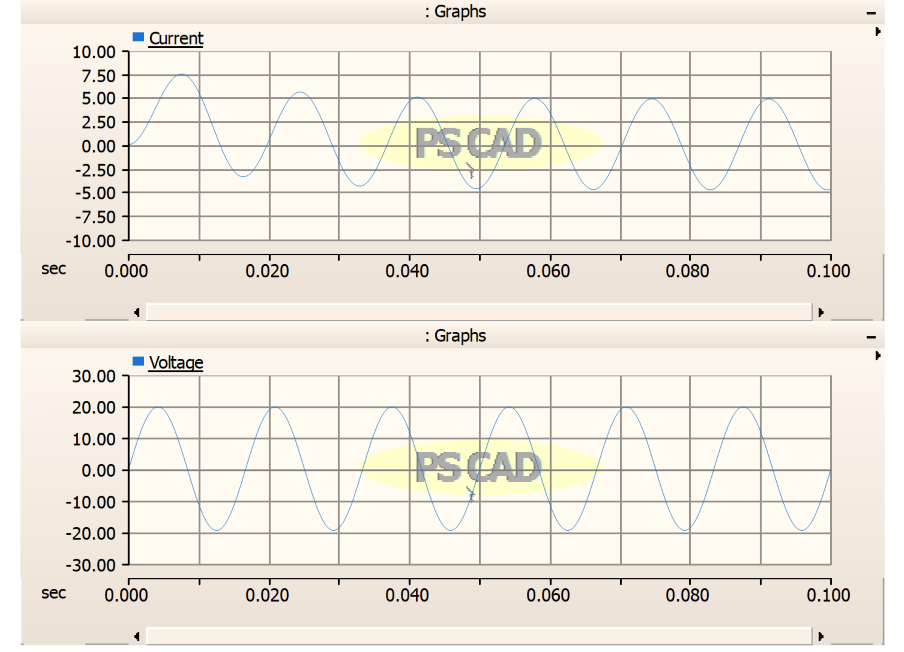<center>


</center>


## Summary - Fault Current Transient Solution

For a single-phase fault on a radial power system with RL equivalent impedance and no prefault load, then with a voltage
source defined by:

$$ {v_s}\left( t \right) = \sqrt 2 {V_M}\sin \left( {\omega t + \theta } \right) $$

the fault current starting at t=0 will have the form:

$$
i\left( t \right) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\left( {\sin \left( {\omega t + \theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right) - \sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right)
$$

This single-phase fault current current is characterized by:

-   Steady-state sinusoidal component
    (also referred to as the symmetrical current).
-   An additional DC component that decays exponentially.
- The sum total of these components gives us the net asymmetrical current.
-   The DC component puts additional stress on the circuit breaker during the first cycle of the fault.

<center>© 2024 Dr. David Lubkeman</center>